# CNN(Convolutional Neural Network) 합성곱 신경망
- 합성곱 층에서 샘플을 일차원 혹은 다차원으로 입력받아 하나 하나의 뉴런이 입력층을 다양하게 찍어 다양한 z값을 출력하는것
- 용어: 필터(뉴런), 커널(뉴런의 선형방정식:가중치+절편), 특성맵(다차원 z값), 패딩(0으로 채우기), 스트라이드(이동 칸수), 풀링(특성맵 줄이는 일종의 필터)

### 순서: 입력층 패딩->합성곱층 필터 지남+활성화 함수->특성맵->풀링->1차원으로->밀집층->출력층

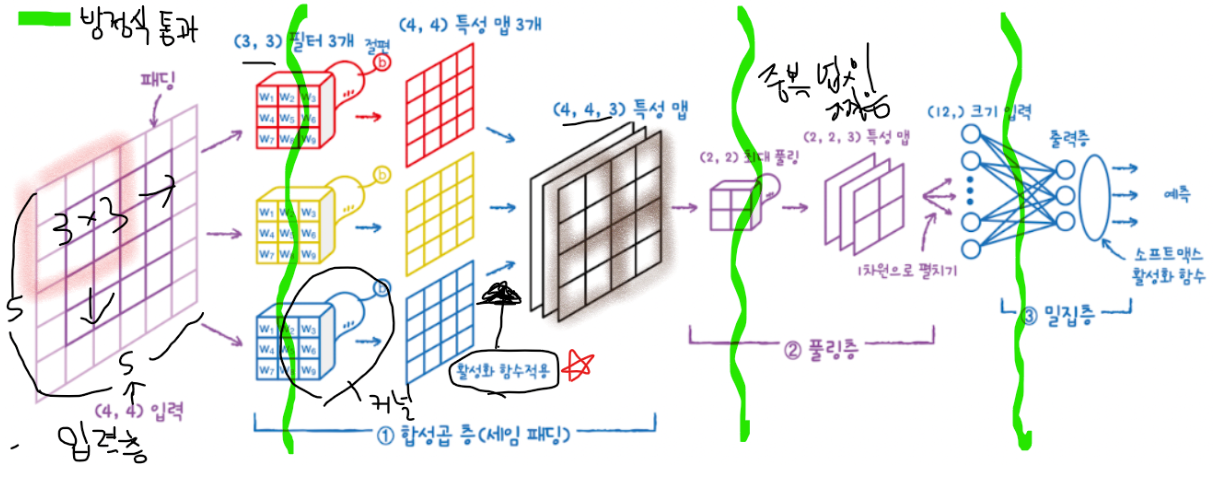
### CNN모델은 입력층->합성곱+풀링층(여러개 가능)->밀집층(여러개가능)->출력층으로 이루어짐
- 합성곱층은 다차원으로 데이터를 받을 수 있고 반드시 밀집층보다 먼저 오며 특성맵을 1차원화 후 밀집층으로 이동
- 입력은 1차원~다차원으로 받을 수 있고 입력층이 n차원이면 필터도 n차원이어야 함-> 현재 입력층 (4,4)의 2차원
- 필터의 커널(가중치)은 반드시 2차원이어야 함-> 커널의 크기는 우리가 정하며 (3,3)으로 하였고 필터(뉴런)개수도 3개로 우리가 정함  
~결국 하나의 필터는 총 9개의 가중치와 1개의 절편(그림의 b)를 가지게 되며 이 필터를 도장처럼 입력층에 찍음  
~또한 각각의 필터는 다 다른 가중치와 절편을 가진 다른 선형방정식들을 가지게 됨
- 각 필터는 (4,4)의 입력층을 받아 기본적으로 왼쪽 위부터 한칸씩 이동하면서 오른쪽으로->끝에 오면 한칸 내려가서 다시 왼쪽부터 오른쪽으로  
~필터는 처음에 왼쪽 위부터 (3,3)으로 찍어 입력층의 9개의 데이터에 필터의 9개의 가중치를 매칭 되게 곱하고 절편 더해 합성곱1 출력  
~합성곱은 하나의 스칼라 값으로 출력되며 이를 반복하여 합성곱1-16까지 결과를 냄
- 이 합성곱들의 모음이 특성맵이며 해당 특성맵은 (4,4): 하나의 칸에는 하나의 스칼라 값이 존재하며 이미 Relu와 같은 활성화함수를 거친상태
- 이때 우리가 입력받은 데이터는 (4,4)인데 (5,5)가 된 이유-> 바깥부분에 0으로 채워주는 ***패딩***을 했기때문  
~**패딩(padding)**:4개의 가장자리 값들은 한번밖에 안찍혀 정보가 소실될 수 있으므로 0을 바깥에 채워 필터에 여러번 찍히도록 하기 위해
### 패딩하면 주로 samepadding을 쓰며 자동으로 개수에 맞는 0을 채워 최종 특성맵 크기는 입력 크기와 같게함
~***스트라이드(stride)***: 찍을때마다 필터를 몇칸씩 이동할지를 결정(기본값 1이며 주로 1칸씩 이동, 2칸 이상씩도 가능)
- 이 과정을 필터마다 반복하며 나온 (4,4)특성맵 3개를 합쳐 (4,4,3)의 최종 특성맵 완성  
~특성맵의 마지막 차원의 개수는 필터수와 동일(3차원=필터수3)
- ***풀링(pooling)*** 으로 특성맵의 차원은 그대로 유지하고 행/열만 크기를 줄임(4,4,3)->(2,2,3)
~이유: 크기를 줄이는 것이 경험적으로 더 나은 성능을 냄  
~풀링층에도 필터처럼 풀링 도장이 존재-> 이 도장의 커널사이즈는 우리가 정하고->(2,2) 이 도장으로 특성맵을 겹치는 부분없이 찍음  
~결과 (4,4)->(2,2)가 됨. 또한 3차원의 개수(합성곱 필터의 개수)인 3은 그대로: 따라서 (4,4,3)->(2,2,3)  
~이 풀링필터는 가중치가 없고 필터가 찍는(2,2)영역에서 최대값을 뽑거나(max pooling) 평균값을 뽑음(average pooling)
- 이 풀링을 거친 특성맵들은 다시 합성곱층을 지날 수도 있음-> 합성곱층이 끝나면 1차원화 되어((2,2,3)->(12,)) 밀집층 들어가 출력층->활성화함수->예측

In [2]:
from tensorflow import keras

#합성곱 층 만들기 by layers.Conv2D
keras.layers.Conv2D(10,                # 필터 개수
                   kernel_size=(3,3),  # 필터의 생김새(크기) 지정,  보통 (3,3)이나 (5,5)크기가 권장
                   activation='relu',  #필터에 찍히 합성곱에 행해질 활성화 함수 종류(주로 relu많이 사용)
                   padding='same',     # defalut는 'valid'로 패딩안함, same으로하면 테두리에 알아서 0채워줌
                   strides=1)           # defalut는 1로 1칸씩 이동하며 제일 많이씀. 2칸씩 이동하려면 2로, (2,3)으로 오2->아래3도 가능

#풀링층 만들기
keras.layers.MaxPooling2D(2,           #값 하나면 (2,2)의 크기, 튜플로(2,3)으로 크기 정할수도 있지만 잘 사용X
                         strides=2,    #풀링 크기가 2이므로 strides도 자동으로 2
                         padding='valid')  #패딩을 해줄 필요가 없으므로 'valid'
#여기서 strides와 padding은 안써줘도 됨

keras.layers.AveragePooling2D(2)
#주로 avgpooling보다 maxpooling을 사용하는데 평균풀링의 경우 특성맵의 중요정보를 희석시킬수도 있기때문

<AveragePooling2D name=average_pooling2d, built=True>

## Conv2D는 2차원 데이터를 입력받겠다는 뜻->이미지용-> (28, 28, 1)형태로 받고 커널사이즈 예시는 (3,3)
## 1차원 데이터 받으려면 Conv1D사용-> (100,1)과 같은 형태로 받고 커널사이즈 예시는 3
## 3D 영상받으려면 Conv3D사용-> (frames,height,width,channels)로 받고 커널사이즈예시=(3, 3, 3)

## 또 다른 이미지
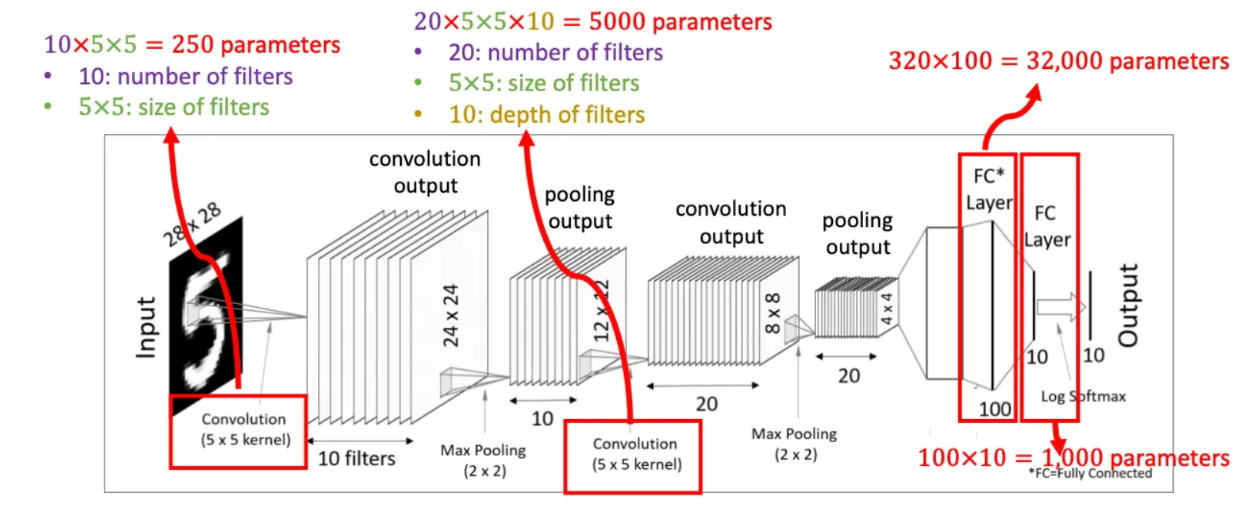


### 추가: 1차원 데이터 10개에 대해 필터가 10개고 커널사이즈가 3이면 나오는 z값은?
- (10-3+1)*10= 80개의 z값  
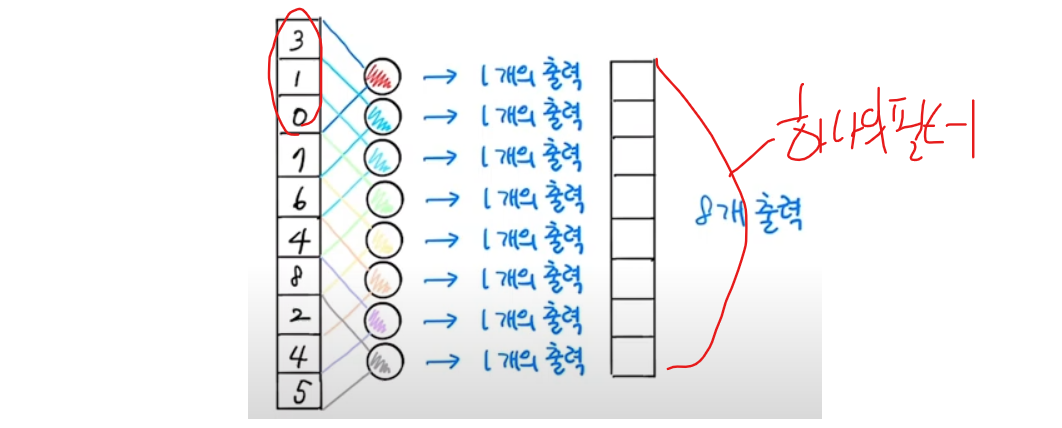

# 컬러이미지(3차원)
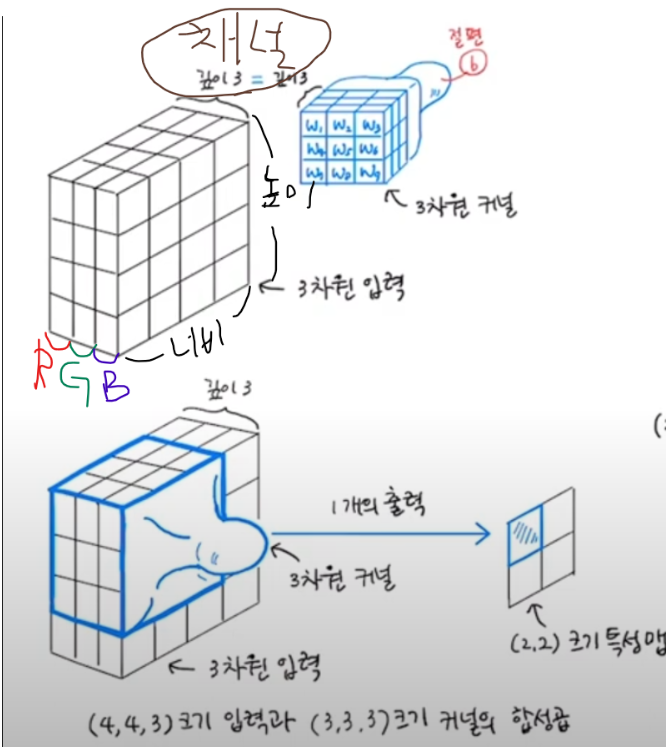
- 컬러이미지는 너비,높이에 추가로 깊이(R,G,B) or 채널이라고도 부름  
- 합성곱을 수행하기위해서는 채널에 대응할 수 있는 깊이가 존재하는 필터(도장)이 필요
- 사진의 경우 입력값은 (4,4,3), 3차원 커널은(3,3,3)으로 27개의 가중치와 1개의 절편이 존재
- 도장을 하나 찍을때마다 27개의 값이 하나의 스칼라값으로 변환->최종적으로 (2,2)의 특성맵으로 변환  
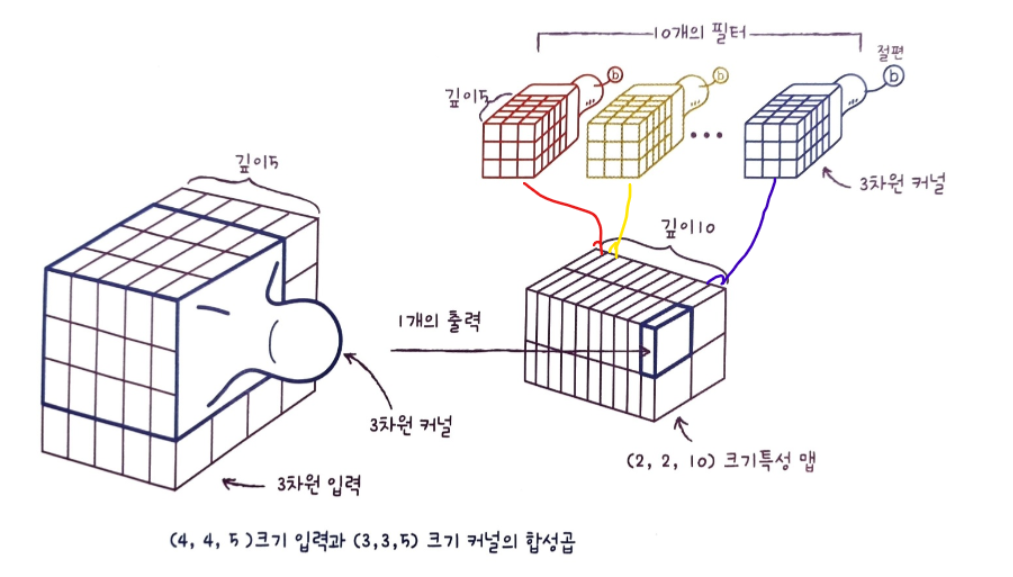
## 필터가 여러개면
- 필터개수가 n개면 특성맵의 크기는 (2,2,n)
# 케라스의 합성곱층은 3차원 입력을 기대
# 따라서 (28,28)의 2차원 입력이 들어오면 (28,28,1)의 3차원으로 변환

# 1. CNN으로 이미지 분류

### CNN에 넣을떄는 채널차원이 필수로 필요-> reshape(이미지개수,높이(행),너비(열),채널(RGB))
### 1차원이 들어가는 밀집층과 달리 다차원으로 받음
- 이미지개수 빼고는 plt.imshow(행,열,RGB채널)과 유사
- 흑백 이미지면 채널값에 1을 추가

### 1. 데이터 준비:패션MNIST사용
- train의 (48000,28,28)을 (48000,28,28,1)로 하고 %255하여 0~1값으로-> train을 train과 validation으로 분리

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

#데이터 불러오기
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# 구조변화
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 합성곱 신경망 만들기

### 2. 객체 만들기

In [5]:
# 객체 만들기
model = keras.Sequential()

### 3. 합성곱층 만들어 넣기

In [6]:
# 합성곱층 넣기
model.add(keras.layers.Conv2D(32,              #필터개수
                              kernel_size=3,   # conv2d이므로 필터의 커널 사이즈는 자동으로(3,3)
                              activation='relu',
                              padding='same',
                              input_shape=(28,28,1)))  #(48000,28,28,1)이지만 결국 이미지 하나는 (28,28,1)-> 이 형태로 48000개를 받겠다
# 이 층을 지나면 (28,28,32)의 특성맵 생성

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## samepadding을 사용하므로 알맞은 0의 개수를 채워넣어 특성맵크기는 입력층의 크기와 같은 (28,28)로 유지
## 단 필터개수가 32개이므로 (28,28,32)가 됨

### 4. 풀링층 넣기(합성곱층 넣고 바로 풀링층 add)

In [7]:
# 풀링층 넣기
model.add(keras.layers.MaxPooling2D(2)) # (2,2)의 풀링 필터-> (14,14,32)의 특성맵으로 축소

### 5. 두번쨰 합성곱-풀링층 넣기

In [8]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',  #이번에 64개의 필터
                              padding='same'))
model.add(keras.layers.MaxPooling2D(2))
# 특성맵->(14,14,64)->(7,7,64)

### 6. 일렬로 펼치는 층+밀집은닉층+출력층 추가

In [9]:
model.add(keras.layers.Flatten())  #일렬로
model.add(keras.layers.Dense(100, activation='relu'))   #은닉층
model.add(keras.layers.Dropout(0.4))    #규제
model.add(keras.layers.Dense(10, activation='softmax'))   #출력층->10개의 클래스 분류

### 7-1. model.summary로 모델 구조 보기 가능
- 각 층의 특성맵 크기과 파라미터(가중치+절편)총 개수 볼 수 있음
- inputlayer출력
- 1합성곱층 파라미터= 3*3*1*32+32=320
- 2합성곱층 파라미터= 3*3*32*64+64=18496
- flatten클래스는 7*7*64->(3136,)의 배열로
- 은닉층의 파라미터는 3136*100+100=313700
- 출력층 파라미터는 100*10+10=1010

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

### 7-2. plot_model로 그림으로 표현

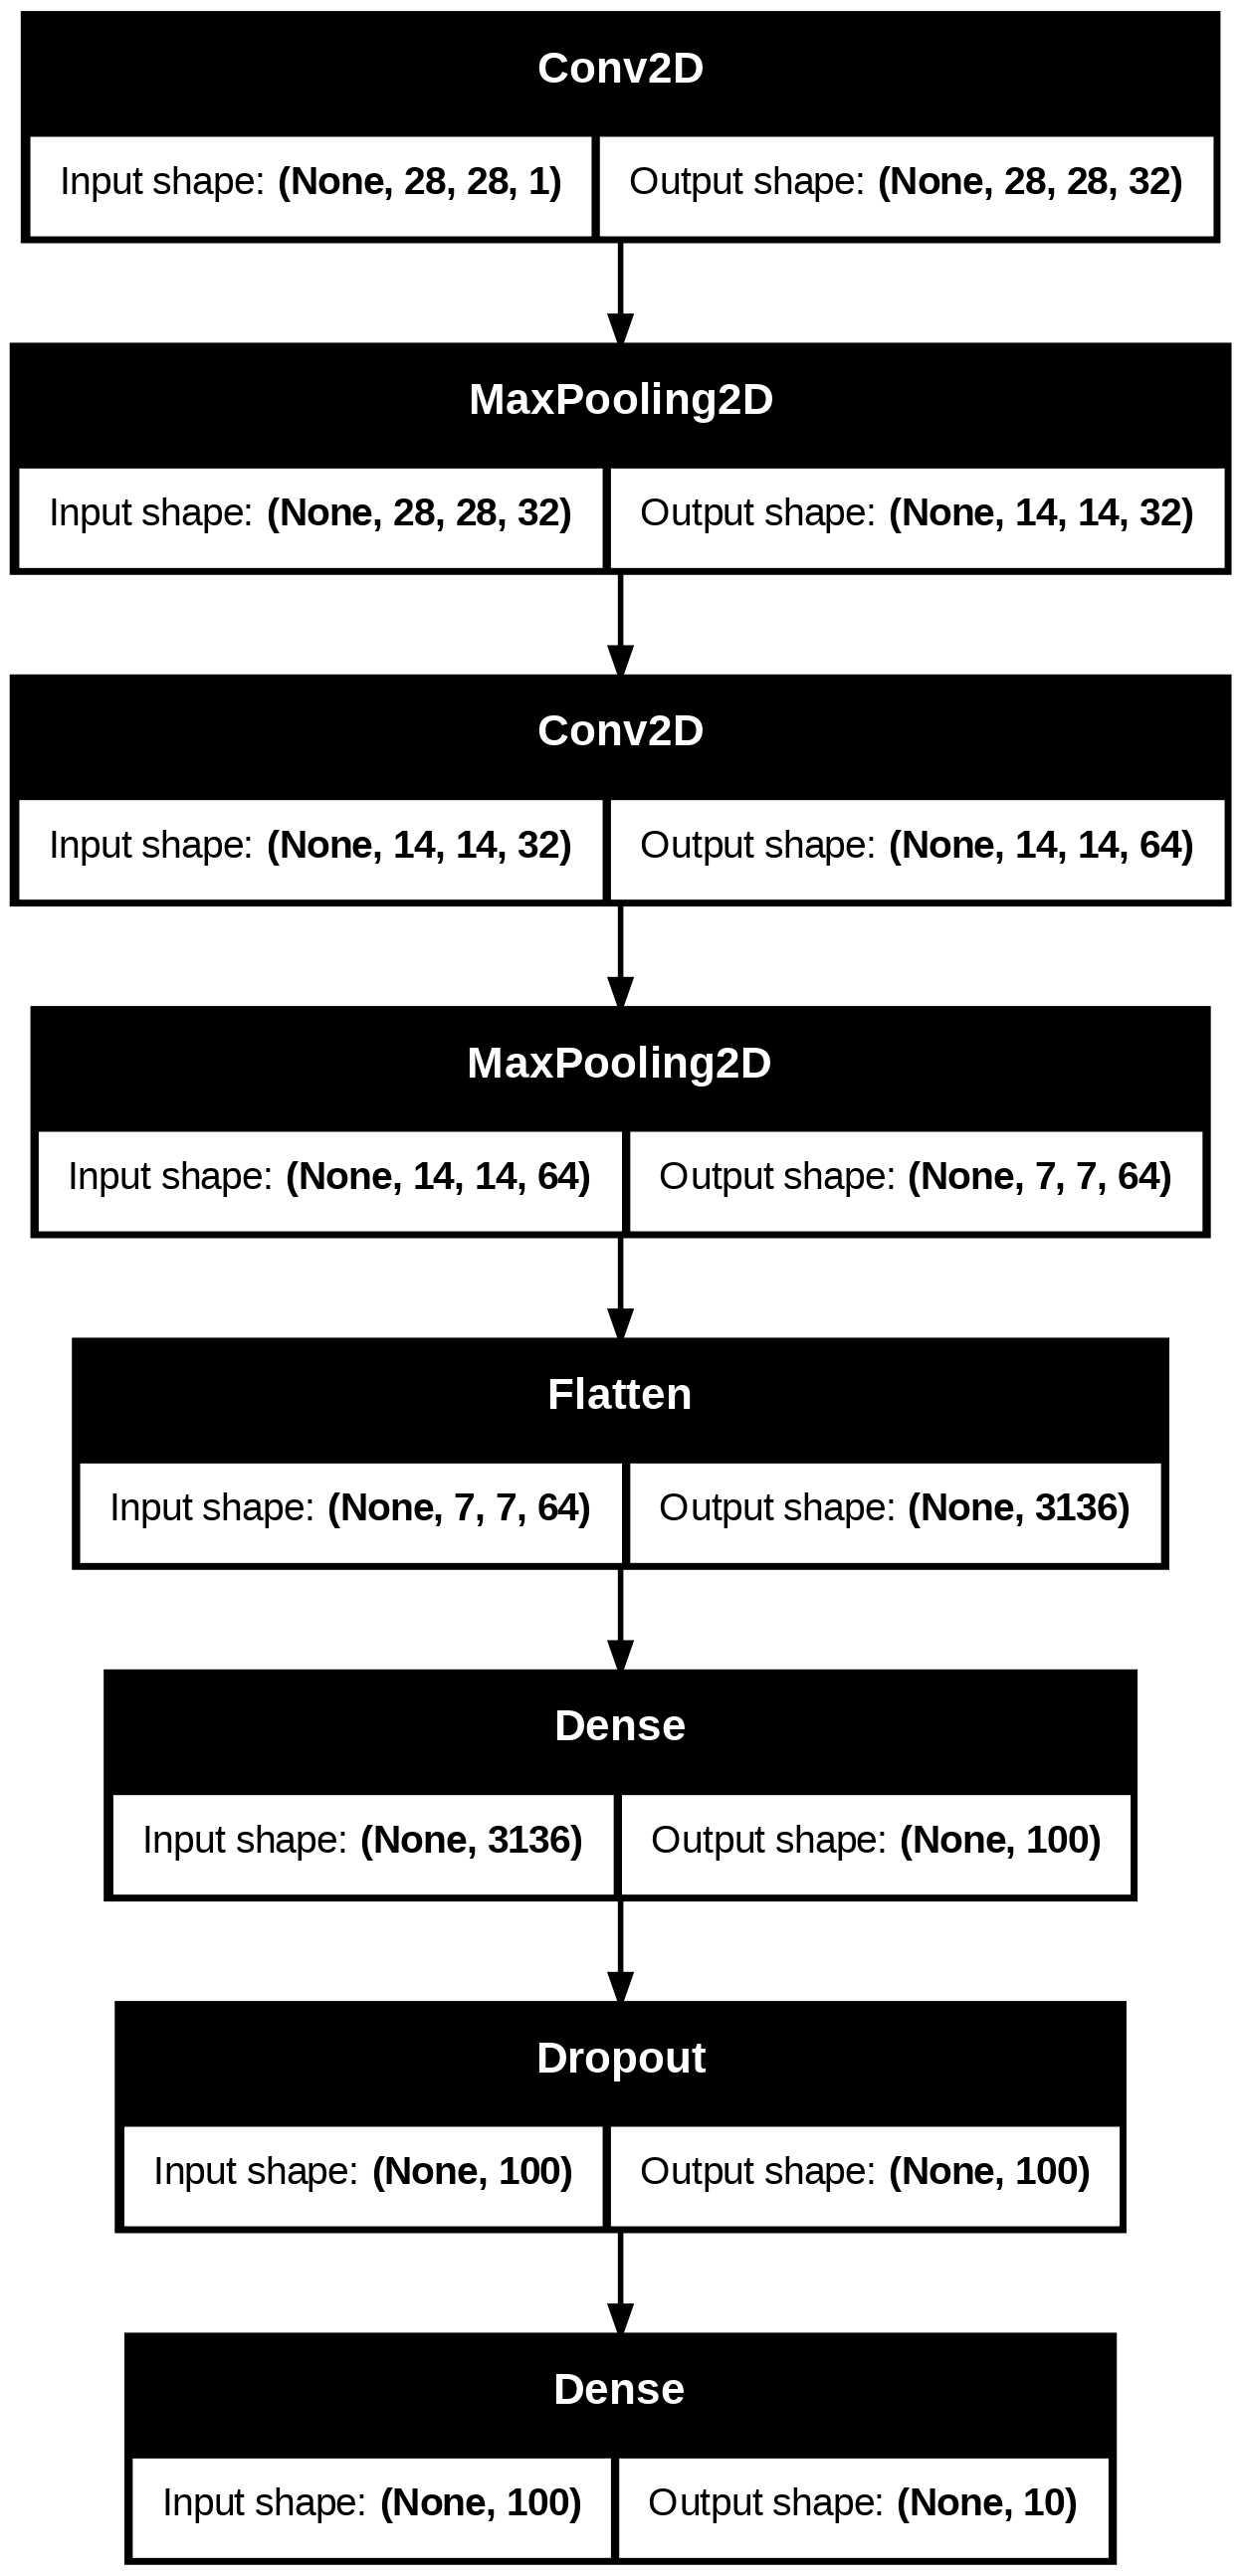

In [11]:
keras.utils.plot_model(model, show_shapes=True)

## 그림으로 요약
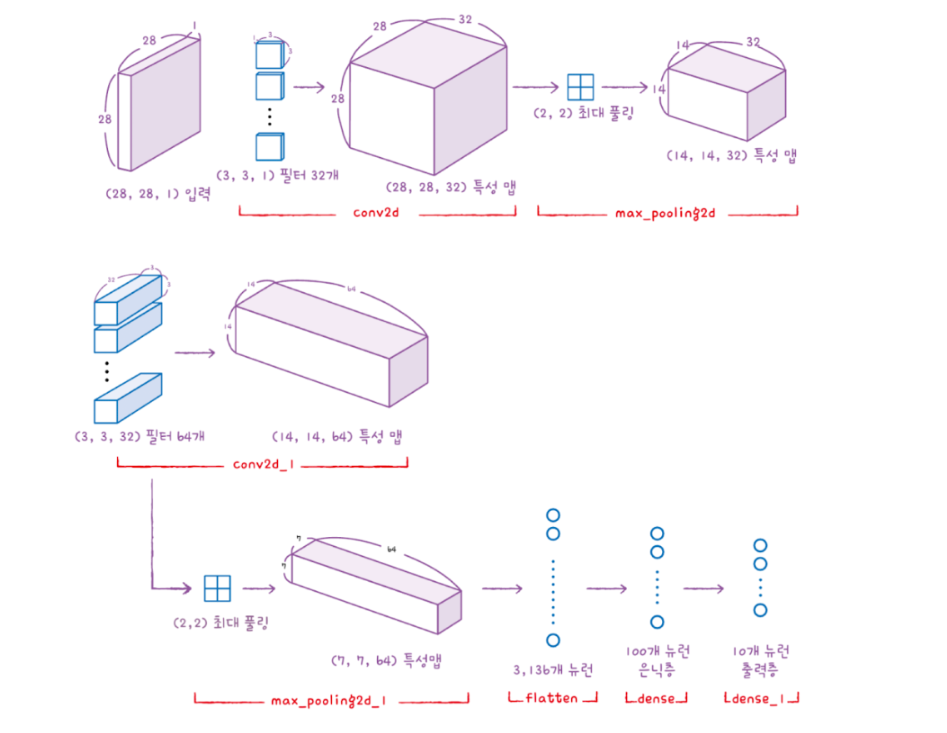

### 8. 모델 컴파일과 훈련

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(x_train,y_train, epochs=20,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7422 - loss: 0.7173 - val_accuracy: 0.8777 - val_loss: 0.3271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8740 - loss: 0.3573 - val_accuracy: 0.8928 - val_loss: 0.2898
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8880 - loss: 0.3061 - val_accuracy: 0.9063 - val_loss: 0.2568
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9040 - loss: 0.2666 - val_accuracy: 0.9130 - val_loss: 0.2361
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9128 - loss: 0.2424 - val_accuracy: 0.9100 - val_loss: 0.2456
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9197 - loss: 0.2164 - val_accuracy: 0.9124 - val_loss: 0.2369


### 9. 손실 그래프 그리기-> 최적의 epoch정하기

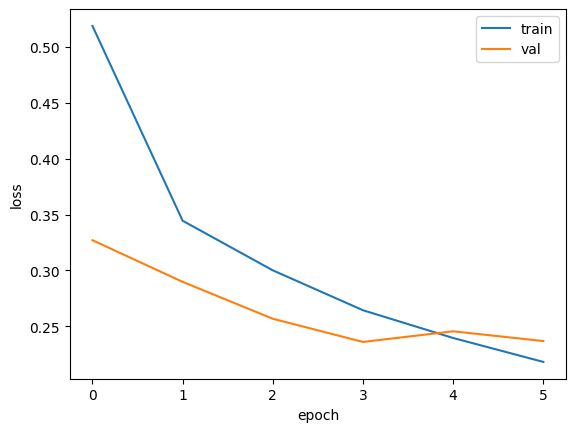

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])   #model.fit할때 validation_data집어넣었으므로 가능
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 10. 최적의 파라미터로 검증하기
- 이미 restore_best_weights=True이므로 최적의 파라미터가 자동으로 모델에 설정됨->바로 evaluate, predict하면 됨

In [14]:
model.evaluate(x_val, y_val)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9166 - loss: 0.2292


[0.2360815852880478, 0.9129999876022339]

### 11. 예측하기
- 데이터 넣을때 (1,28,28,1)형태로 넣어줘야함

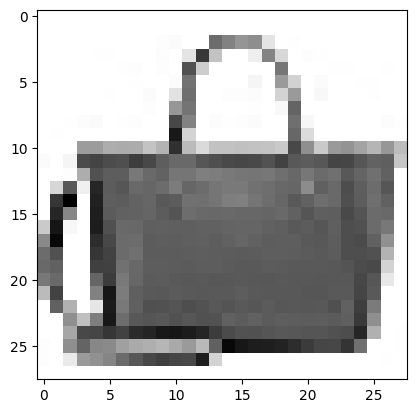

In [15]:
#예측할 데이터
plt.imshow(x_val[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
#예측
import numpy as np

preds = model.predict(x_val[0:1])  # [0]이 아닌 [0:1]인 이유->[0]이면 (28,28,1) vs [0:1]이면 (1,28,28,1)
print(preds)
np.round(preds,3)  #아홉번째 클래스

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[7.27353984e-12 6.85181998e-16 2.30714868e-14 6.44271352e-14
  7.27084517e-13 1.65559753e-11 1.47338503e-10 8.68786210e-10
  1.00000000e+00 1.20063655e-11]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

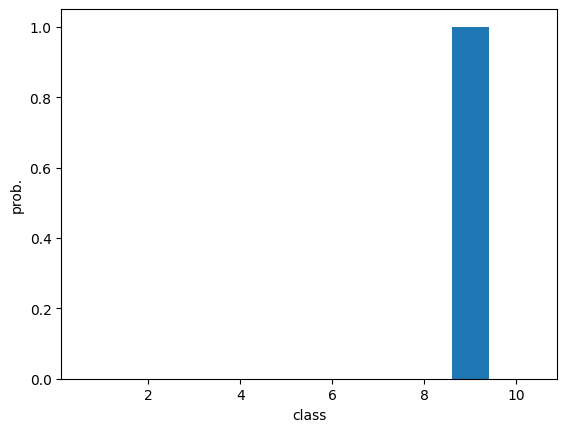

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
# 타깃값
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
import numpy as np
print(classes[np.argmax(preds)]) # 정답=가방

가방


### 12. 마지막으로 test세트로 성능 검증

In [20]:
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9086 - loss: 0.2641


[0.25770050287246704, 0.906499981880188]

# 2. 합성곱 신경망의 시각화

## 1. 가중치 시각화
- 이미지에서 유의미한 특징을 가지는 픽셀에는 높은 가중치가 적용돼 특성맵에서 높은 출력값을 가질것임

### 위에서 만든 모델 불러오기

In [21]:
model = keras.models.load_model('best-cnn-model.keras')

### 모델에서 만들어 집어넣은 층들 가져오기

In [22]:
model.layers  #합성곱층, 풀링층, flatten층, dense층, dropout층 보여줌, 인덱싱으로 각 층 불러올 수 있음

[<Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

### 층의 가중치 보기 - model.layers.weights
- 커널크기는 (3,3,1)이며 필터수는 32개이므로 가중치는 (3,3,1,32)
- 절편은 필터 개수인 (32,)

In [23]:
conv = model.layers[0]  #첫번째 합성곱층 선택

print(conv.weights[0].shape, conv.weights[1].shape)  #[0]이 가중치, [1]이 절편

(3, 3, 1, 32) (32,)


### 가중치 정보

In [24]:
conv_weights = conv.weights[0].numpy()  #가중치 값을 넘파이로

print(conv_weights.mean(), conv_weights.std())  #첫번째 합성곱층의 가중치의 평균과 표준편차

-0.010895118 0.19308944


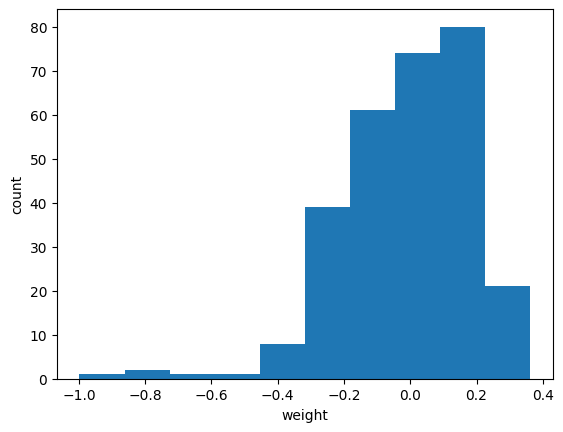

In [25]:
# 이미지로
plt.hist(conv_weights.reshape(-1, 1))  #hist에 넣기위해 1차원으로
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

### 32개 필터의 커널(3,3)을 시각화 해보기
- imshow는 배열에 있는 최댓값과 최솟값을 양끝에 놓는 기준으로 픽셀 강도 표현->추가로 cmap설정으로 색 범위 조정가능
- 가중치가 클수록 색 밝음

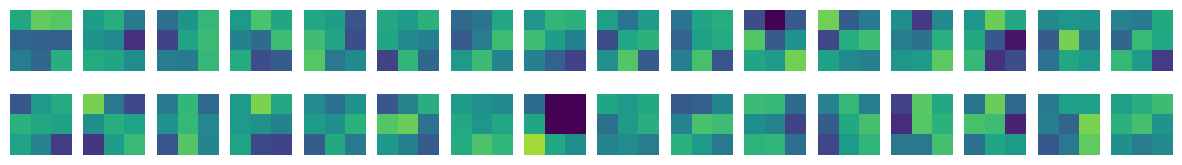

In [26]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):    # 16개 이미지 2줄로
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)   #(3,3,1,1)에서 (3,3,1,32)까지
        axs[i, j].axis('off')                              #vmin과 vmax로 컬러맵으로 표현할 최소최대값 지정

plt.show()

### 훈련하지 않은 합성곱 신경망의 커널 가중치와 비교해보기

In [27]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                                          padding='same', input_shape=(28,28,1)))

no_training_conv = no_training_model.layers[0]

print(no_training_conv.weights[0].shape)

no_training_weights = no_training_conv.weights[0].numpy()

print(no_training_weights.mean(), no_training_weights.std())    #0에 가까움

(3, 3, 1, 32)
0.011546062 0.08063889


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


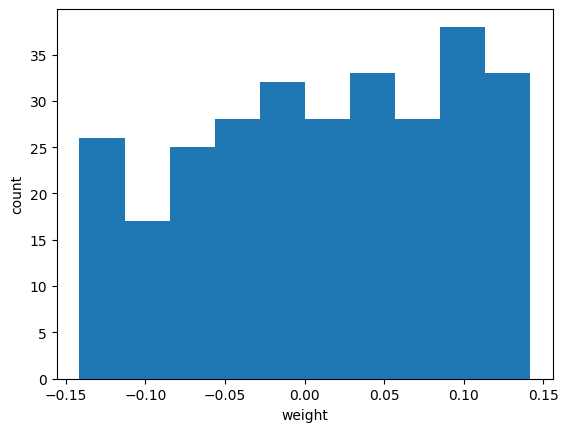

In [28]:
# hist로
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

### 텐서플로우는 처음 가중치를 초기화하여 정할때 균등분포에서 랜덤하게 선택
- 7_numpy_deeplearning에서 확인가능

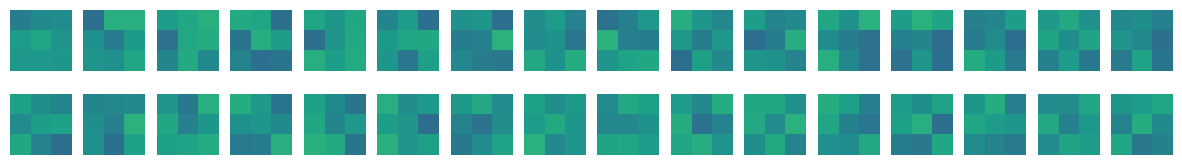

In [29]:
# imshow로 보기
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()  #밋밋함

## 2. 특성맵 시각화를 위한 함수형 API사용
- 입력이나 출력층이 2개인 복잡한 모델의 경우 keras.sequential()로는 안됨
- 함수형 API사용-> 케라스의 Model 클래스 이용
- 먼저 층을 만듬  
dense1 = keras.layers.Dense(100,activation='sigmoid')  
dense2=keras.layers.Dense(10,activation='softmax')  

- add없이 층에 직접 삽입    
inputs=keras.Input(shape=(784,))   #inputlayer층을 우리가 직접 생성, 크기도 우리가 지정  
hidden=dense1(inputs)  # inputs 넣으면 dense1을 지나 z값 출력하고 이를 hidden에 저장  
outputs=dense2(hidden)  # hidden을 dense2층에 넣어 출력값을 outputs에 저장  

- model만들기  
model=keras.Model(inputs, outputs)  #과정을 저장하기 때문에 중간에 있는 hidden을 집어넣을필요없이 처음의 inputlayer와 끝의 output만 입력
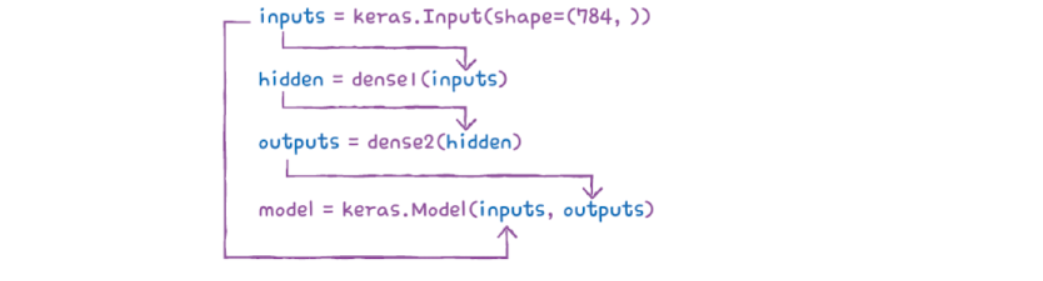

## 그렇다면 특성맵 시각화를 위해 왜 함수형 API가 필요한가?
- 모델이 끝까지 가면 중간에 존재하는 층의 출력을 볼 수 없으므로 API로 일부분만 떼어오기
- 첫번째 합성곱의 결과(특성맵)을 보기위해 inputlayer부터 합성곱층 레이어 까지만 가져올것임  
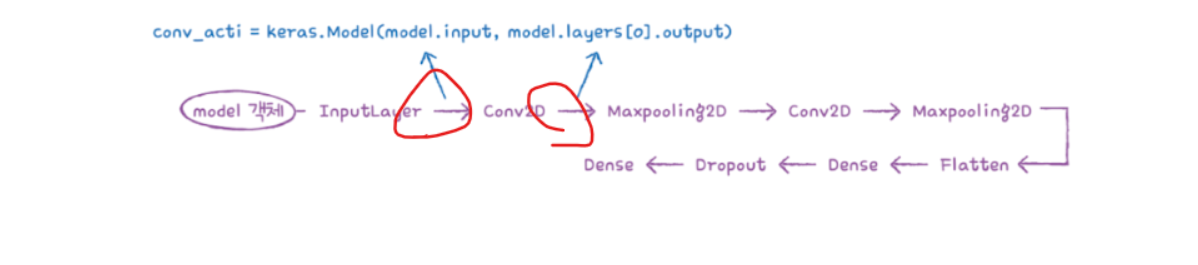
### model은 우리가 만든 CNN모델객체
- model.input으로 inputlayer출력 가능
- model.layers[n].output으로 n번째 층의 output가져올 수 있음

In [30]:
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


### inputlayer로 시작하고 1차합성곱층만을 가지는 새로운 모델 생성

In [31]:
conv_acti = keras.Model(model.inputs, model.layers[0].output)  #model.layers[0]는 첫번째 층인 합성곱층

## 3. 특성맵 시각화
- 만든 새로운 모델에 .predict하면 마지막층의 결과가 나옴(마지막층이 합성곱층이면 특성맵, 밀집층이면 일렬의 z값)

### x_train의 첫번째 데이터 샘플 사용

In [32]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

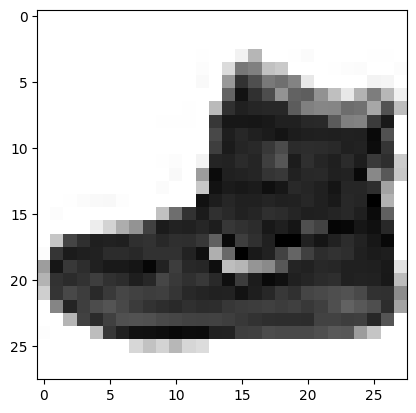

In [33]:
plt.imshow(x_train[0], cmap='gray_r')
plt.show()  #앵클부츠

### predict에 넣기위해 데이터 전처리 후 predict
- (28,28)을 (1,28,28,1)로 ->

In [34]:
inputs = x_train[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


### conv_acti모델에서는 predict값으로 특성맵이 출력되게됨

In [35]:
print(feature_maps.shape)

(1, 28, 28, 32)


### 특성맵 그리기(풀링전)

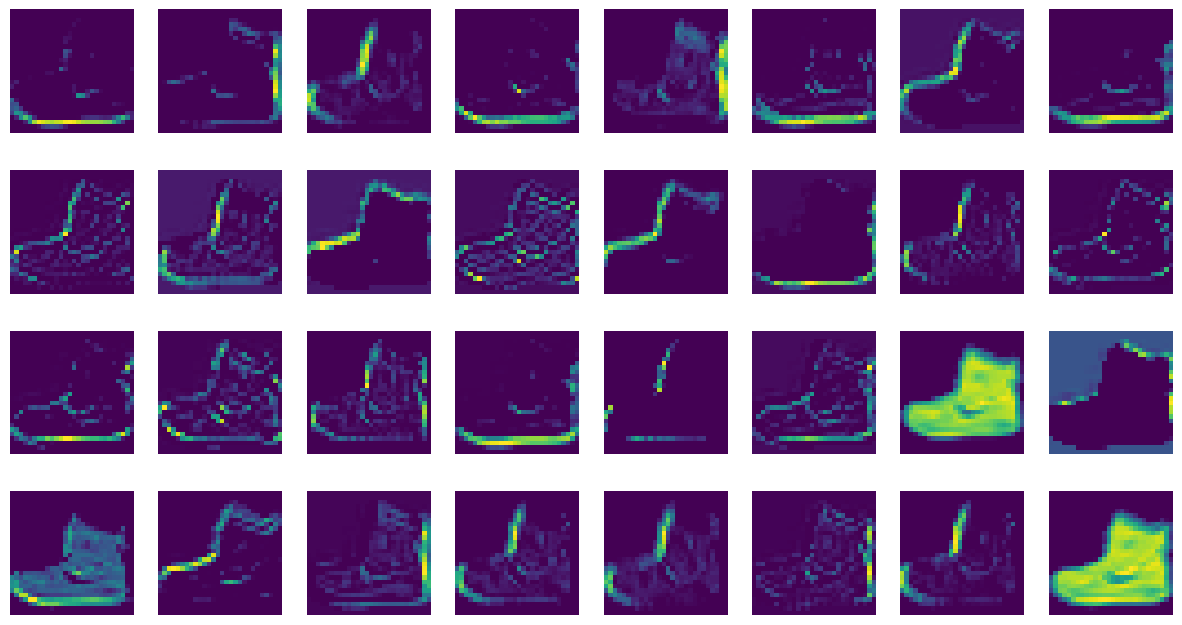

In [36]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

## 어떤 특성맵은 수직선을 감지하기도 하고, 전면이 모두 칠해진 부분을 감지하기도 하며 배경을 감지하기도 하는 등 다 각기 다른 특성을 감지

### 두번째 합성곱층의 특성맵까지 보기

In [37]:
conv2_acti = keras.Model(model.inputs, model.layers[2].output)  #[2]인 이유는 [1]이 풀링층이고 [2]가 두번째 합성곱층이어서
feature_maps = conv2_acti.predict(inputs)
print(feature_maps.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
(1, 14, 14, 64)


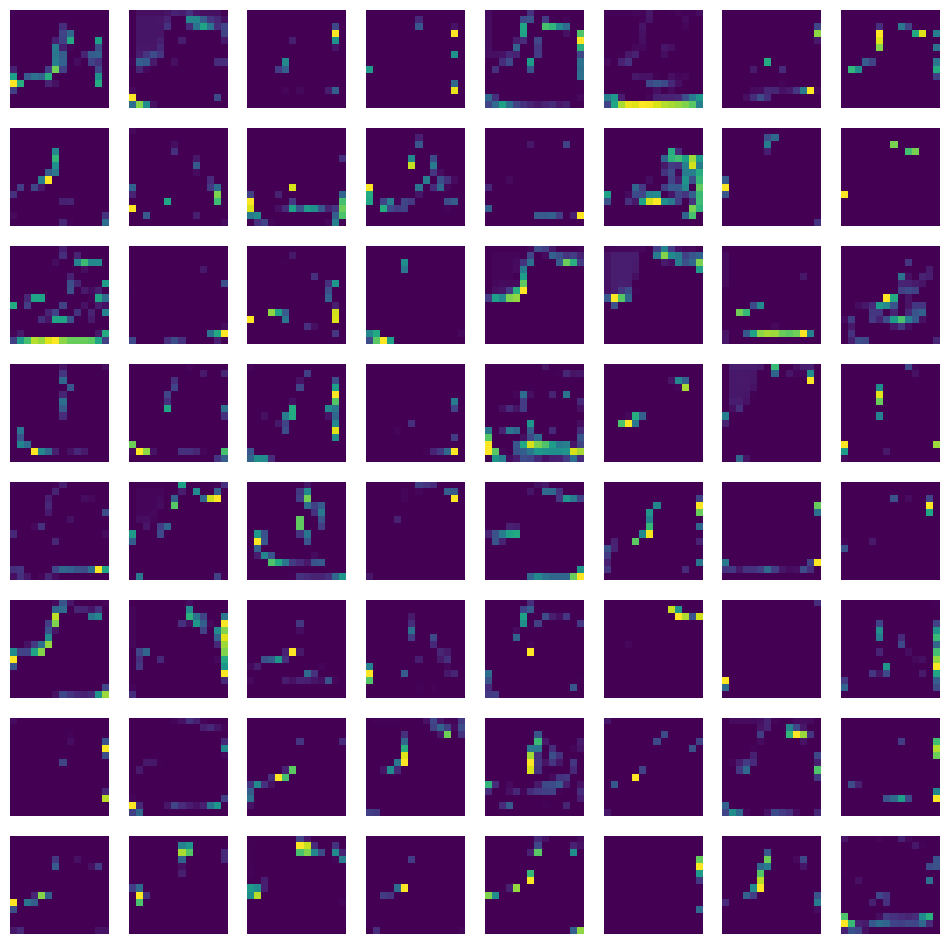

In [38]:
# 그리기
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

# 두번 거치니 이해하기 난해
- 앞부분의 합성곱층은 이미지의 시각적인 정보를 감지
- 뒷부분의 합성곱층은 이 시각적인 정보를 바탕으로 추상적인 정보를 학습
### 특성맵이 난해해지는 경향은 합성곱층을 많이 쌓을수록 심해짐